In [ ]:
!pip install --upgrade keras tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 58.9 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolve

In [ ]:
from IPython import get_ipython
from IPython.display import display
import os, os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow import keras # Import keras from tensorflow

In [ ]:
## Encodes the labels in one hot format
def toOneHot(X):

    z = np.max(X) + 1
    X_oh = np.eye(z)[X]

    return X_oh

In [ ]:
# Load and label EMG files
def loadAndLabel(folder_path,w,p):

    # folder_path -> path of the folder that contains each subject subfolder
    # w -> window size
    # p -> moving average delays

    data = [name for name in os.walk(folder_path)]

    X = []
    Y = []

    # Iterates folders
    for i in range(1,len(data)):

        # Iterates files in each folder
        for j in range(0,len(data[i][2])):

            # loads EMG data
            emgData = pd.read_csv(os.path.join(data[i][0], data[i][2][j]), sep='\t', header=None).values

            # Performs segmentation in windows
            for k in range(0,emgData.shape[0] - w + 1,w):

                d = emgData[k:k+w,:]
                d = np.abs(d) # Absolute value of the EMG data
                # Moving average filter for each channel
                for n in range(d.shape[1]-1):
                    d[:,n] = np.convolve(d[:,n], np.ones(p)/p, mode='same')
                X.append(d)

                # Generate labels for each window
                if data[i][2][j].split(".")[0] == '0':
                    Y.append(0)
                elif data[i][2][j].split(".")[0] == '1':
                    Y.append(1)
                elif data[i][2][j].split(".")[0] == '2':
                    Y.append(2)
                elif data[i][2][j].split(".")[0] == '3':
                    Y.append(3)
                elif data[i][2][j].split(".")[0] == '4':
                    Y.append(4)

    X = np.array(X)
    X = X/np.max(X)
    Y = np.array(Y)
    Y = toOneHot(Y)

    return X, Y

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/EMG hand gestures dataset"
X, Y = loadAndLabel(path,200,20) # Load and label EMG data

In [ ]:
print(X.shape)
print(Y.shape)

(4095, 200, 4)
(4095, 5)


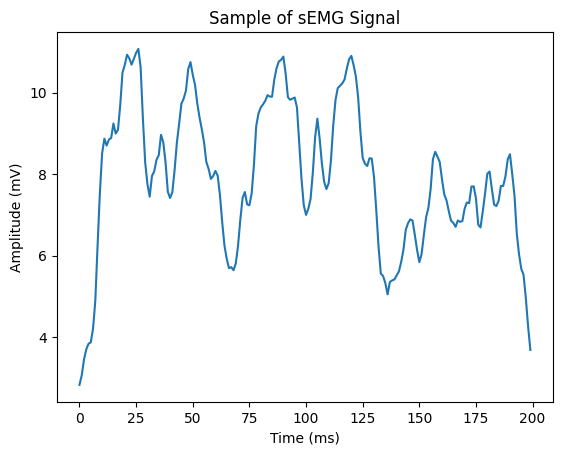

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming X has shape (num_samples, window_size, num_channels)
# and you want to plot channel 0 of sample 100

# Get the data for channel 0 of sample 100
data = X[100, :, 0]

# Assuming your sampling rate is 1000 Hz (1 sample per millisecond)
time = np.arange(0, len(data))  # Time in milliseconds

# Create the plot
plt.plot(time, data * 1000.0)

# Set the title and axes labels with units
plt.title("Sample of sEMG Signal")
plt.xlabel("Time (ms)")
plt.ylabel("Amplitude (mV)")

# Show the plot
plt.show()

In [ ]:
# Split intro training and validation
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Define model
model = Sequential()
model.add(Dense(32,activation='tanh'))
model.add(LSTM(16))
model.add(Dense(32,activation='tanh'))
model.add(Dense(5,activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(X_train,Y_train,batch_size=256,epochs=1000,validation_data=[X_test,Y_test])

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - acc: 0.2155 - loss: 1.6058 - val_acc: 0.2723 - val_loss: 1.5968
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - acc: 0.3281 - loss: 1.5914 - val_acc: 0.3394 - val_loss: 1.5681
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - acc: 0.3889 - loss: 1.5434 - val_acc: 0.3944 - val_loss: 1.3845
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.4026 - loss: 1.2993 - val_acc: 0.3553 - val_loss: 1.4362
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.3964 - loss: 1.2622 - val_acc: 0.3980 - val_loss: 1.1940
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.4026 - loss: 1.2212 - val_acc: 0.3114 - val_loss: 1.7311
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - acc: 0.3174 - loss: 1.6663 - val_acc: 0.2967 - val_loss: 1.5095
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.3052 - loss: 1.4749 - val_acc: 0.4005 - val_loss: 1.4034
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 200, 32)        │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,017 (46.95 KB)

 Trainable params: 4,005 (15.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8,012 (31.30 KB)

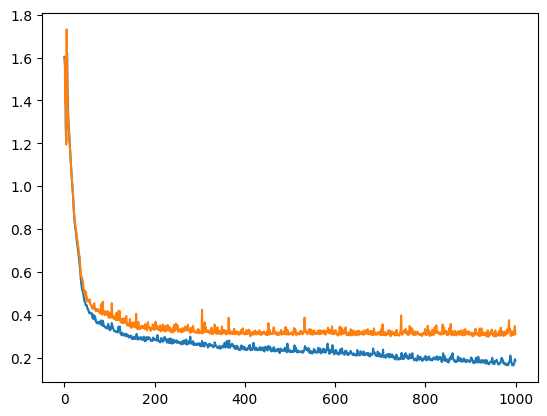

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
def count_parameters(model):
    # Accessing trainable parameters using keras.backend.count_params
    trainable_count = int(np.sum([keras.backend.count_params(w) for w in model.trainable_weights]))
    return trainable_count # Changed to sum of count_params for each weight

In [ ]:
count_parameters(model)

4005

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


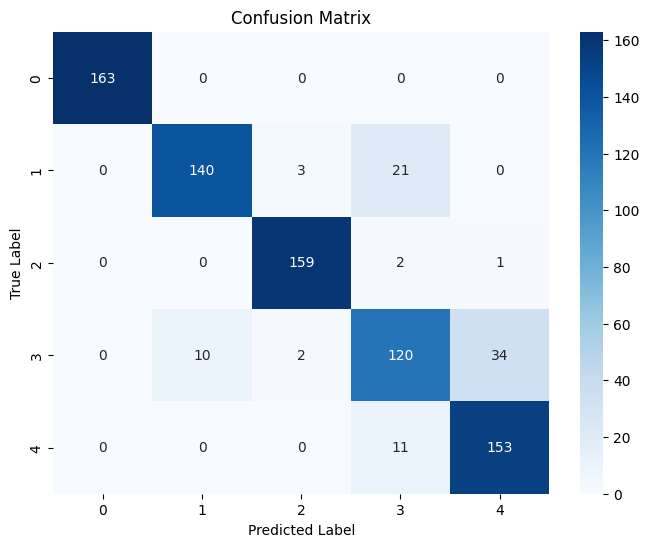

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test data
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert predictions to class labels
Y_true_classes = np.argmax(Y_test, axis=1)  # Convert true labels to class labels

# Generate confusion matrix
cm = confusion_matrix(Y_true_classes, Y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['0', '1', '2', '3', '4'],
            yticklabels=['0', '1', '2', '3', '4'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

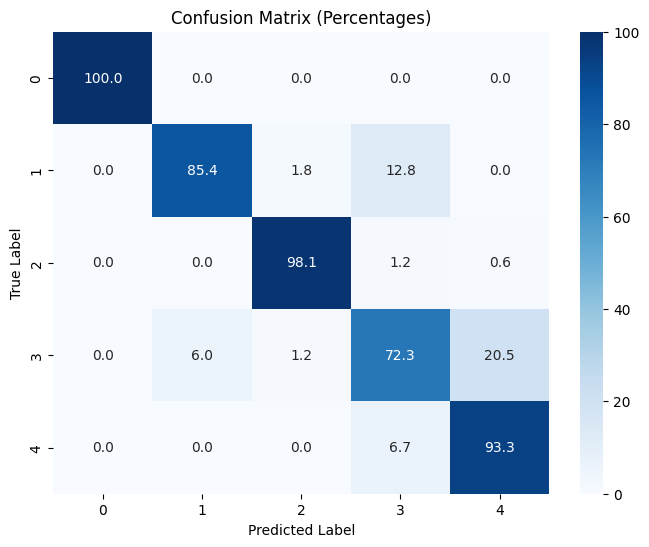

In [ ]:
# Generate confusion matrix
cm = confusion_matrix(Y_true_classes, Y_pred_classes)

# Normalize the confusion matrix to percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix with percentages
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap='Blues',
            xticklabels=['0', '1', '2', '3', '4'],
            yticklabels=['0', '1', '2', '3', '4'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Percentages)')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Make predictions on the test data
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert predictions to class labels
Y_true_classes = np.argmax(Y_test, axis=1)  # Convert true labels to class labels

# Calculate accuracy
accuracy = accuracy_score(Y_true_classes, Y_pred_classes)

# Print accuracy
print(f"Accuracy: {accuracy:.2f}")

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy: 0.90


In [ ]:
import sys
import numpy as np

def get_model_size(model):
    """Calculates the size of a Keras model in MB.

    Args:
        model: The Keras model.

    Returns:
        The size of the model in MB.
    """
    total_size = 0
    for layer in model.layers:
        for weights in layer.get_weights():  # Iterate over layer weights
            total_size += sys.getsizeof(weights)

    total_size_mb = total_size / (1024 * 1024)  # Convert to MB
    return total_size_mb

# Get the model size
model_size_mb = get_model_size(model)
print(f"Model size: {model_size_mb:.2f} MB")

Model size: 0.02 MB
